In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('2ndnew_train.tsv',sep = "\t",encoding = "ISO-8859-1")
df_test = pd.read_csv('2ndnew_validation.tsv',sep = "\t",encoding = "ISO-8859-1")

In [3]:
df_train.head()

,Tweet,Category
0,depression hurts cymbalta help,0
1,right cipro make things much worse give bayer ...,0
2,paxil need help,0
3,lamotrigine sjs made chaos vengeful sadistic,0
4,decided skip humira shot today body hysterics ...,0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = df_train["Tweet"],df_test["Tweet"],df_train["Category"],df_test["Category"]

In [5]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight("balanced",np.unique(y_train),y_train)
sample_weight = []
for item in y_train:
    if item == 0:
        sample_weight.append(0.5)
    else:
        sample_weight.append(1.5)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(strip_accents="ascii", token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", lowercase=True, stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [7]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train,sample_weight = sample_weight)
predictions = naive_bayes.predict(X_test_cv)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Precision score: ", precision_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions))
print (classification_report(y_test, predictions))

Accuracy score:  0.8827425009738995
Precision score:  0.40588235294117647
Recall score:  0.5822784810126582
             precision    recall  f1-score   support

          0       0.96      0.91      0.93      4660
          1       0.41      0.58      0.48       474

avg / total       0.90      0.88      0.89      5134



In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap="RdBu", cbar=False,
xticklabels=["Non-ADR", "ADR"], yticklabels=["Non-ADR", "ADR"])
plt.xlabel("true label")
plt.ylabel("predicted label")

Text(113.922,0.5,'predicted label')

In [10]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append("ADR")
    else:
        testing_predictions.append("Non-ADR")
check_df = pd.DataFrame({"actual_label": list(y_test), "prediction": testing_predictions, "abstract":list(X_test)})
check_df.replace(to_replace=0, value="Non-ADR", inplace=True)
check_df.replace(to_replace=1, value="ADR", inplace=True)

In [11]:
check_df.head()

,actual_label,prediction,abstract
0,Non-ADR,Non-ADR,fucking need humira
1,Non-ADR,Non-ADR,retake next friday bloody fail doc going need ...
2,Non-ADR,Non-ADR,scared start fluoxetine opinion xx
3,Non-ADR,ADR,ok stopped taking lamictal give mg week
4,Non-ADR,Non-ADR,novartis announces secukinumab demonstrated su...


In [17]:
probablities = naive_bayes.predict_proba(X_test_cv)

In [22]:
probablities

array([[0.78059216, 0.21940784],
       [0.77413813, 0.22586187],
       [0.95120723, 0.04879277],
       ...,
       [0.002083  , 0.997917  ],
       [0.94140083, 0.05859917],
       [0.49906849, 0.50093151]])

In [27]:
new_array = []
for item in probablities:
    new_array.append(item[1])

In [28]:
new_array

[0.2194078361767079,
 0.22586187479744843,
 0.04879277164941948,
 0.5617077947416594,
 2.1195026750401865e-06,
 0.11926874003932418,
 0.4145075969431079,
 0.180338685897622,
 0.010482824690592344,
 0.0007340515399676467,
 0.002300348355153319,
 0.0032198426476172694,
 0.005674127117059662,
 0.0002916467621614973,
 0.038942060860262126,
 0.00040121945904305066,
 0.024731787770328438,
 0.07695381212199547,
 0.0581043422593741,
 0.025369853333528387,
 0.05240686113802069,
 0.9760444230645773,
 0.743820849598889,
 7.8621959289243e-05,
 0.15056192685648576,
 0.034174083253830326,
 0.9372921718265838,
 0.00039337719312188246,
 8.815504822246356e-06,
 0.00031707692220375055,
 0.29051358828234247,
 0.00023434643260969616,
 0.1144036013544296,
 0.0056704145608071806,
 0.7604027271621265,
 0.03500780351486244,
 0.021130970899188226,
 9.001011452568646e-06,
 0.30750488424639033,
 8.205227517653735e-05,
 0.10360000681672461,
 0.0007145681281812914,
 0.792330462355256,
 1.7753367766355981e-07,
 1.7

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,new_array)
roc_auc = auc(false_positive_rate, true_positive_rate)


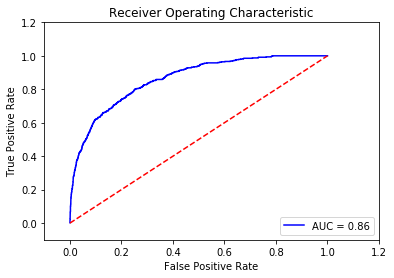

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()